Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:

a.	Import the necessary packages

b.	Load the training and testing data 

c.	Define the network architecture using Keras 

d.	Train the model using SGD/Adam optimizer

e.	Evaluate the network  

f.	Plot the training loss and accuracy

In [1]:
# Import the necessary packages (ratta)
import matplotlib.pyplot as plt # visual lib
import tensorflow as tf
# model building
from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
import numpy as np

In [2]:
#grabbing CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

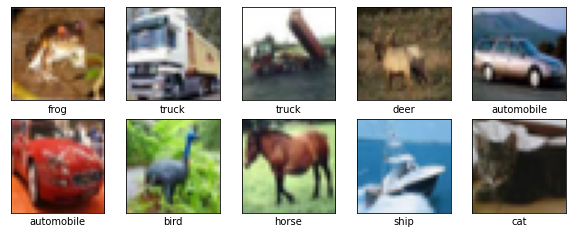

In [3]:
#showing images of mentioned categories
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
# Converting matrix into array

X_train = train_images.reshape((train_images.shape[0], 32 * 32 * 3))
X_test = test_images.reshape((test_images.shape[0], 32 * 32 * 3))

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [7]:
X_train.shape

(50000, 3072)

In [8]:
Y_train, Y_test = train_labels, test_labels

In [9]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [ ]:
Y_train[0]

In [10]:
#building ANN model
model = Sequential()
model.add(Dense(128, input_shape=(3072,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 10)                250       
                                                                 
Total params: 403,410
Trainable params: 403,410
Non-trainable params: 0
_________________________________________________________________


In [14]:
epochs = 10 

In [11]:
model.compile(loss="categorical_crossentropy", optimizer='sgd',metrics=["accuracy"])
S = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9667 - accuracy: 0.2758 - val_loss: 1.8780 - val_accuracy: 0.3111
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7628 - accuracy: 0.3660 - val_loss: 1.7262 - val_accuracy: 0.3849
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6599 - accuracy: 0.4077 - val_loss: 1.6184 - val_accuracy: 0.4205
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6025 - accuracy: 0.4306 - val_loss: 1.6841 - val_accuracy: 0.4061
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5551 - accuracy: 0.4471 - val_loss: 1.5692 - val_accuracy: 0.4449
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5218 - accuracy: 0.4577 - val_loss: 1.5527 - val_accuracy: 0.4416
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4915 - accuracy: 0.4688 - val_loss: 1.4867 - val_accuracy:

In [12]:
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
A = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7434 - accuracy: 0.3703 - val_loss: 1.6615 - val_accuracy: 0.4066
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6249 - accuracy: 0.4144 - val_loss: 1.6128 - val_accuracy: 0.4249
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5738 - accuracy: 0.4352 - val_loss: 1.6215 - val_accuracy: 0.4224
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5406 - accuracy: 0.4485 - val_loss: 1.5510 - val_accuracy: 0.4548
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5179 - accuracy: 0.4578 - val_loss: 1.5555 - val_accuracy: 0.4417
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4940 - accuracy: 0.4659 - val_loss: 1.5099 - val_accuracy: 0.4584
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4734 - accuracy: 0.4717 - val_loss: 1.5485 - val_accuracy:

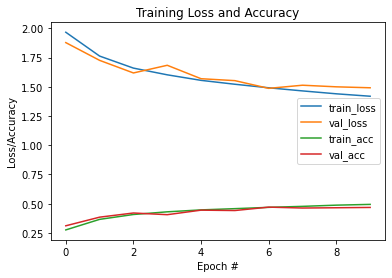

In [15]:
#plotting the training loss and accuracy
plt.figure()
plt.plot(np.arange(0, epochs), S.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), S.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), S.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), S.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

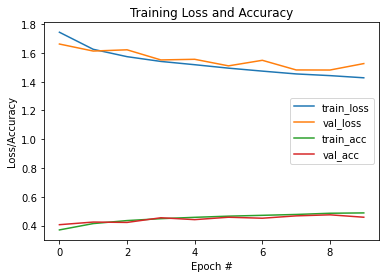

In [16]:
#plotting the training loss and accuracy
plt.figure()
plt.plot(np.arange(0, epochs), A.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), A.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), A.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), A.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()